# MOVIELENSÂ§ß‰Ωú‰∏ö

In [10]:
!pip install numpy
!pip install pandas
!pip install jupyter
!pip install matplotlib
!pip install scikit-learn
!pip install Pillow
!pip install opencv-python
!pip install img2vec_pytorch
!pip install torch
!pip install torchvision

  Using cached jupyter-1.0.0-py2.py3-none-any.whl.metadata (995 bytes)
  Using cached qtconsole-5.5.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached anyio-4.3.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached argon2_cffi-23.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached jupyter

In [11]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [12]:
ratings.head()

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [13]:
users.head()

user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer

In [14]:
movies.head()

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [15]:
movies_info.head()

movie_id                                 name                       genre  \
0         1                    Toy Story (1995)   Animation|Adventure|Comedy   
1         2                      Jumanji (1995)      Adventure|Comedy|Family   
2         3             Grumpier Old Men (1995)               Comedy|Romance   
3         4            Waiting to Exhale (1995)         Comedy|Drama|Romance   
4         5  Father of the Bride Part II (1995)        Comedy|Family|Romance   

             release_time                                              intro  \
0  22 November 1995 (USA)  A cowboy doll is profoundly threatened and jea...   
1  15 December 1995 (USA)  When two kids find and play a magical board ga...   
2  22 December 1995 (USA)  John and Max resolve to save their beloved bai...   
3  22 December 1995 (USA)  Based on Terry McMillan's novel, this film fol...   
4   8 December 1995 (USA)  George Banks must deal not only with the pregn...   

         directors                                          stars  
0    John Lasseter                Tom Hanks|Tim Allen|Don Rickles  
1     Joe Johnston       Robin Williams|Kirsten Dunst|Bonnie Hunt  
2    Howard Deutch         Walter Matthau|Jack Lemmon|Ann-Margret  
3  Forest Whitaker  Whitney Houston|Angela Bassett|Loretta Devine  
4    Charles Shyer         Steve Martin|Diane Keaton|Martin Short

## ‰∏Ä„ÄÅ‰º†ÁªüÂÅèÂ•ΩÂèëÁé∞

### Áî∑Â•≥ÂÅèÂ•ΩÂàÜÊûê

In [16]:
# Á≠õÈÄâÂá∫ËßÇÂΩ±‰∫∫Ê¨°Â§ß‰∫é300ÁöÑÁîµÂΩ±
popular = ratings['movie_id'].value_counts()
popular = popular[popular > 300]
popular = popular.rename('count')
popular = popular.rename_axis('movie_id')
print("Popular:")
display(popular)

Popular:


movie_id
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
2404     301
1845     301
1012     301
535      301
2363     301
Name: count, Length: 1053, dtype: int64

In [17]:
import matplotlib.pyplot as plt

# Â¶Ç‰ΩïË°°ÈáèÂÅèÂ•ΩÁ®ãÂ∫¶ÔºüÁúãËøáÊüêÈÉ®ÁîµÂΩ±ÁöÑÁî∑ÊÄß/Â•≥ÊÄßËßÇ‰ºóÂØπËØ•ÈÉ®ÁîµÂΩ±ÁöÑÂπ≥ÂùáÊâìÂàÜÊòæÁÑ∂ÊòØÊúÄÈáçË¶ÅÁöÑË°°Èáè‰æùÊçÆÔºå
# ‰ΩÜÊàë‰ª¨ÈúÄË¶ÅÊ≥®ÊÑèÂà∞ÔºåÂèó‚ÄúÂÅèÂ•Ω‚ÄùÁ®ãÂ∫¶Áî®Áî∑ÊÄß/Â•≥ÊÄßËßÇ‰ºóÂØπËØ•ÈÉ®ÁîµÂΩ±ÁöÑÂπ≥ÂùáÊâìÂàÜ‰πãÂ∑ÆÊù•Ë°°ÈáèË¶ÅÊØîÁî®ÂêÑËá™ÁöÑÁªùÂØπÂÄºÊù•Ë°°ÈáèÊõ¥ÂêàÁêÜ„ÄÇ
# ‰ΩÜÊòØÂêåÊó∂ÔºåËØ•ÁîµÂΩ±ÁöÑËßÇÂΩ±‰∫∫Ê¨°‰πüÂ∫îÂΩìÊúâÂä†ÊùÉÔºåÊØîÂ¶ÇÊÄªËßÇÂΩ±‰∫∫Ê¨°ÈùûÂ∏∏Â§öÁöÑÁîµÂΩ±Â¶ÇÊûúËøòÂëàÁé∞Âá∫ÊòéÊòæÁöÑÊÄßÂà´ÊâìÂàÜÂ∑ÆÂºÇÔºå
# ÈÇ£‰πàÊõ¥ËÉΩËØ¥ÊòéËøôÈÉ®ÁîµÂΩ±ÊòØÊòéÊòæÁöÑÊÄßÂà´ÂÅèÂ•ΩÁîµÂΩ±ÔºåÂõ†‰∏∫ÊâìÂàÜÈöèÊú∫ÊÄßÁ≠âÂèØËÉΩÂØºËá¥ÈùûÂÜÖÂú®ÁöÑÁî∑Â•≥ÊâìÂàÜÂ∑ÆÂºÇÁöÑÂõ†Á¥†ÂΩ±Âìç‰ºöËæÉÂº±ÔºåÊÄßÂà´Â∑ÆÂºÇÁªìÊûúÁöÑ‚Äú‰ø°Â∫¶‚ÄùÂ∞±Êõ¥È´ò„ÄÇ
# ‰∏çËøáËøô‰∏ÄÈ°πÂè™ÊòØËæÖÂä©ÊåáÊ†áÔºå‰∏çÂ∫îÊàê‰∏∫ÂΩ±ÂìçÊúÄÁªàËØÑ‰ª∑ÂáΩÊï∞ÁöÑÊúÄ‰∏ªË¶ÅÂõ†Á¥†„ÄÇÊïÖÊúÄÁªàÊàëÈÄâÊã©Áî® " * ln(ÊÄªËßÇÂΩ±‰∫∫Ê¨°) " ÁöÑÊñπÂºè„ÄÇ
# Âõ†Ê≠§ÔºåÊàëÊúÄÁªàÂÆö‰πâÁöÑËØÑ‰ª∑ÂáΩÊï∞ÊòØ " (Áî∑ÊÄßËßÇ‰ºóÂπ≥ÂùáÊâìÂàÜ - Â•≥ÊÄßËßÇ‰ºóÂπ≥ÂùáÊâìÂàÜ) * ln(ÊÄªËßÇÂΩ±‰∫∫Ê¨°) " „ÄÇ

# ÊàëËøôÈáåÊ≤°Êúâ‰ΩøÁî®ÊØèÈÉ®ÁîµÂΩ±ÁöÑ‚ÄúÁî∑ÊÄßËßÇÂΩ±‰∫∫Ê¨°‚ÄùÂíå‚ÄúÂ•≥ÊÄßËßÇÂΩ±‰∫∫Ê¨°‚ÄùËøô‰∏§‰∏™ÊåáÊ†áÔºå
# ÊòØÂõ†‰∏∫Ëøô‰ºöÊ∂âÂèäÁî∑/Â•≥ÊÄßËßÇ‰ºó‰∫∫Êï∞‰∏ç‰∏ÄËá¥Á≠âÈóÆÈ¢òÔºå‰ºöÂ∏¶Êù•È∫ªÁÉ¶ÔºåÁ∫µÁÑ∂ËøõË°åÂΩí‰∏ÄÂåñÁ≠âÊìç‰Ωú‰πüÂæàÈöæ‰∏ç‰ΩøËØÑ‰ª∑ÁªìÊûúÂ§±Áúü„ÄÇ

gender_users = pd.merge(users, ratings, on='user_id', how='outer')
gender_users = gender_users[gender_users['movie_id'].isin(popular.index)] # Âè™‰øùÁïôpopularÁöÑÁîµÂΩ±

female_users = gender_users[gender_users['gender'] == 'F']
male_users = gender_users[gender_users['gender'] == 'M']

# ËÆ°ÁÆóÂπ≥ÂùáÊâìÂàÜ
female_mean_rating = female_users.groupby('movie_id')['rating'].mean()
male_mean_rating = male_users.groupby('movie_id')['rating'].mean()
print("Female mean rating:")
display(female_mean_rating)
print("\nMale mean rating:")
display(male_mean_rating)

# ËÆ°ÁÆóËØÑ‰ª∑ÂáΩÊï∞
score = male_mean_rating - female_mean_rating
score = pd.merge(score, popular, on='movie_id', how='outer') # Âä†ÂÖ•ÊÄªËßÇÂΩ±‰∫∫Ê¨°Ëøô‰∏ÄÂàó
score['score'] = score['rating'] * np.log(score['count']) # score['score']Ëøô‰∏ÄÂàó‰∏∫ËØÑ‰ª∑ÂáΩÊï∞
print("\nScore:")
display(score)

Female mean rating:


movie_id
1       4.187817
2       3.278409
3       3.073529
6       3.682171
7       3.588235
          ...   
3916    4.093458
3927    3.535714
3948    3.619048
3949    3.950000
3952    3.761905
Name: rating, Length: 1053, dtype: float64


Male mean rating:


movie_id
1       4.130552
2       3.175238
3       2.994152
6       3.909988
7       3.267717
          ...   
3916    3.869697
3927    3.589041
3948    3.641838
3949    4.174107
3952    3.787986
Name: rating, Length: 1053, dtype: float64


Score:


rating  count     score
movie_id                           
1        -0.057265   2077 -0.437432
2        -0.103171    701 -0.676029
3        -0.079377    478 -0.489727
6         0.227817    940  1.559609
7        -0.320519    458 -1.963777
...            ...    ...       ...
3916     -0.223761    437 -1.360452
3927      0.053327    348  0.312079
3948      0.022791    862  0.154048
3949      0.224107    304  1.281227
3952      0.026081    388  0.155470

[1053 rows x 3 columns]

In [20]:
# Á≠õÂá∫Ââç20ÂêçÂíåÂêé20ÂêçÁöÑÁîµÂΩ±ÔºåÂàÜÂà´‰Ωú‰∏∫Áî∑/Â•≥ÊÄßÂÅèÂ•ΩÁöÑÁîµÂΩ±
male_preference = score.nlargest(20, 'score').reset_index()
female_preference = score.nsmallest(20, 'score').reset_index()
female_preference['score'] = - female_preference['score']
print(male_preference)

    movie_id    rating  count     score
0       1201  0.726351    822  4.875077
1        231  0.638608    660  4.145998
2       3552  0.573602    967  3.943051
3       3760  0.676359    305  3.868985
4       1261  0.611985    548  3.859348
5       3421  0.538286   1207  3.819621
6        784  0.613787    385  3.654026
7       3062  0.619682    352  3.633586
8       1997  0.529605    885  3.593678
9       2410  0.581801    401  3.487291
10        70  0.496844    914  3.387397
11      1089  0.444642   1259  3.173888
12      3740  0.497078    584  3.166338
13      3681  0.544704    325  3.150475
14      3688  0.539489    339  3.143061
15       785  0.465173    765  3.088688
16      1405  0.498054    475  3.069664
17      2409  0.501515    445  3.058274
18      2791  0.407854   1731  3.041143
19      2700  0.424206   1269  3.031368


In [19]:
# ËØ¶ÁªÜÂ±ïÁ§∫Ëøô‰∫õÈÄâÂá∫ÁöÑÁîµÂΩ±ÁöÑ‰ø°ÊÅØ
print("Áî∑ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö")
male_preference_detail = pd.merge(male_preference, movies, on='movie_id', how='inner')
male_preference_detail = male_preference_detail.drop(['rating', 'count', 'score', 'movie_id'], axis=1) # ÂéªÈô§Êó†ÈúÄÂ±ïÁ§∫ÁöÑÂàó
male_preference_detail['ranking'] = male_preference_detail.index.to_series().apply(lambda x: x+1)
male_preference_detail = male_preference_detail.set_index('ranking') # Â¢ûÂä†‚ÄúÊéíÂêç‚ÄùËøô‰∏ÄÂàóÔºåÂπ∂Â∞ÜÂÖ∂ËÆæ‰∏∫index
display(male_preference_detail)

print("\nÂ•≥ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö")
female_preference_detail = pd.merge(female_preference, movies, on='movie_id', how='inner')
female_preference_detail = female_preference_detail.drop(['rating', 'count', 'score', 'movie_id'], axis=1) # ÂéªÈô§Êó†ÈúÄÂ±ïÁ§∫ÁöÑÂàó
female_preference_detail['ranking'] = female_preference_detail.index.to_series().apply(lambda x: x+1)
female_preference_detail = female_preference_detail.set_index('ranking') # Â¢ûÂä†‚ÄúÊéíÂêç‚ÄùËøô‰∏ÄÂàóÔºåÂπ∂Â∞ÜÂÖ∂ËÆæ‰∏∫index
display(female_preference_detail)

Áî∑ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö


title  \
ranking                                                
1             Good, The Bad and The Ugly, The (1966)   
2                               Dumb & Dumber (1994)   
3                                  Caddyshack (1980)   
4                   Kentucky Fried Movie, The (1977)   
5                 Evil Dead II (Dead By Dawn) (1987)   
6                                Animal House (1978)   
7                              Cable Guy, The (1996)   
8                            Longest Day, The (1962)   
9                               Exorcist, The (1973)   
10                                  Rocky III (1982)   
11                        From Dusk Till Dawn (1996)   
12                             Reservoir Dogs (1992)   
13                Big Trouble in Little China (1986)   
14                     For a Few Dollars More (1965)   
15                                    Porky's (1981)   
16                                    Kingpin (1996)   
17            Beavis and Butt-head Do America (1996)   
18                                   Rocky II (1979)   
19                                  Airplane! (1980)   
20       South Park: Bigger, Longer and Uncut (1999)   

                                      genres  
ranking                                       
1                             Action|Western  
2                                     Comedy  
3                                     Comedy  
4                                     Comedy  
5             Action|Adventure|Comedy|Horror  
6                                     Comedy  
7                                     Comedy  
8                           Action|Drama|War  
9                                     Horror  
10                              Action|Drama  
11       Action|Comedy|Crime|Horror|Thriller  
12                            Crime|Thriller  
13                             Action|Comedy  
14                                   Western  
15                                    Comedy  
16                                    Comedy  
17                          Animation|Comedy  
18                              Action|Drama  
19                                    Comedy  
20                          Animation|Comedy


Â•≥ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö


title  \
ranking                                          
1                         Dirty Dancing (1987)   
2                                Grease (1978)   
3                    Jumpin' Jack Flash (1986)   
4        Rocky Horror Picture Show, The (1975)   
5                          Mary Poppins (1964)   
6                       Steel Magnolias (1989)   
7                    Gone with the Wind (1939)   
8                   Sound of Music, The (1965)   
9                     Color Purple, The (1985)   
10                            Anastasia (1997)   
11               Jewel of the Nile, The (1985)   
12                    Never Been Kissed (1999)   
13                          Patch Adams (1998)   
14                Sense and Sensibility (1995)   
15                          French Kiss (1995)   
16          Little Shop of Horrors, The (1960)   
17                       Pretty in Pink (1986)   
18                    Strictly Ballroom (1992)   
19                             Grease 2 (1982)   
20                                 Emma (1996)   

                                  genres  
ranking                                   
1                        Musical|Romance  
2                 Comedy|Musical|Romance  
3         Action|Comedy|Romance|Thriller  
4           Comedy|Horror|Musical|Sci-Fi  
5              Children's|Comedy|Musical  
6                                  Drama  
7                      Drama|Romance|War  
8                                Musical  
9                                  Drama  
10          Animation|Children's|Musical  
11       Action|Adventure|Comedy|Romance  
12                        Comedy|Romance  
13                          Comedy|Drama  
14                         Drama|Romance  
15                        Comedy|Romance  
16                         Comedy|Horror  
17                  Comedy|Drama|Romance  
18                        Comedy|Romance  
19                Comedy|Musical|Romance  
20                  Comedy|Drama|Romance

In [6]:
# ÂÖ∂‰ªñÁöÑÊµÅË°åÁªüËÆ°Èáè
# ùëÖùëé=ùëäùëÖ+(1‚àíùëä)ùëÖ0
# ùëÖùëé=Âπ≥Âùá(Ë¥ùÂè∂ÊñØ)ËØÑÁ∫ß
# ùëÖ=‰∏™‰ΩìËØÑÂàÜÔºöÊ≠§‰∏™‰ΩìÁöÑÂπ≥ÂùáËØÑÂàÜ„ÄÇ
# ùëÖ0=ÂÖàÈ™åËØÑÁ∫ßÔºöÂÖ®Â±ÄÂπ≥ÂùáËØÑÁ∫ßÔºåÈÄÇÁî®‰∫éÊï∞ÊçÆÂ∫ì‰∏≠ÁöÑÊâÄÊúâÈ°πÁõÆ„ÄÇ
# ùëä=Âä†ÊùÉÂõ†Â≠êÔºöÂ¶ÇÊûúÊ≠§È°πÊäïÁ•®ËæÉÂ∞ëÔºåÂàôÂ∫îË∂ã‰∫é0ÔºåÂ¶ÇÊûúÊäïÁ•®ËæÉÂ§öÔºåÂàôÂ∫îË∂ã‰∫é1„ÄÇ
# ùëä=ùëöùëéùë•(ùõº*ùëõ/ùëÅùëéùë£,1)Ôºån‰∏∫ËØ•ÁîµÂΩ±ÁöÑËßÇÂΩ±‰∫∫Ê¨°ÔºåùëÅùëéùë£‰∏∫ÊâÄÊúâÁîµÂΩ±ÁöÑÂπ≥ÂùáËßÇÂΩ±‰∫∫Ê¨°Ôºåùõº‰∏∫0.5Âà∞1‰πãÈó¥ÁöÑÊüê‰∏™Êï∞

#ÈáçÊñ∞ËÆ°ÁÆópopular
R=ratings.groupby('movie_id')['rating'].mean()
N=ratings.groupby('movie_id')['rating'].count()
popular=pd.DataFrame({'rating':R,'count':N})
W=popular['count'].apply(lambda x: max(0.5*x/popular['count'].mean(),1))
popular['rating']=W*popular['rating']+(1-W)*popular['rating'].mean()
popular=popular.sort_values(by='rating',ascending=False)
popular_percentile=popular['rating'].quantile(0.9)
popular=popular[popular['rating']>=popular_percentile]
print(popular)

#Ââ©‰∏ãÁöÑÊ≠•È™§È¢òÁõÆÊ≤°Ë¶ÅÊ±ÇÔºåÂ∞±Âíå‰∏äÈù¢Áî®‰∏ÄÊ†∑ÁöÑÔºåËôΩÁÑ∂‰πüÂèØ‰ª•‰ºòÂåñÊå∫Â§öÔºå‰ΩÜÊòØ‰πüË∂≥Â§ü‰∫Ü
gender_users = pd.merge(users, ratings, on='user_id', how='outer')
gender_users = gender_users[gender_users['movie_id'].isin(popular.index)] # Âè™‰øùÁïôpopularÁöÑÁîµÂΩ±

female_users = gender_users[gender_users['gender'] == 'F']
male_users = gender_users[gender_users['gender'] == 'M']

# ËÆ°ÁÆóÂπ≥ÂùáÊâìÂàÜ
female_mean_rating = female_users.groupby('movie_id')['rating'].mean()
male_mean_rating = male_users.groupby('movie_id')['rating'].mean()
print("Female mean rating:")
display(female_mean_rating)
print("\nMale mean rating:")
display(male_mean_rating)

# ËÆ°ÁÆóËØÑ‰ª∑ÂáΩÊï∞
score = male_mean_rating - female_mean_rating
score = pd.merge(score, popular, on='movie_id', how='outer') # Âä†ÂÖ•ÊÄªËßÇÂΩ±‰∫∫Ê¨°Ëøô‰∏ÄÂàó
score['score'] = score['rating_x'] * score['rating_y'] # score['score']Ëøô‰∏ÄÂàó‰∏∫ËØÑ‰ª∑ÂáΩÊï∞
print("\nScore:")
display(score)

# Á≠õÂá∫Ââç20ÂêçÂíåÂêé20ÂêçÁöÑÁîµÂΩ±ÔºåÂàÜÂà´‰Ωú‰∏∫Áî∑/Â•≥ÊÄßÂÅèÂ•ΩÁöÑÁîµÂΩ±
male_preference = score.nlargest(20, 'score').reset_index()
female_preference = score.nsmallest(20, 'score').reset_index()
female_preference['score'] = - female_preference['score']

# ËØ¶ÁªÜÂ±ïÁ§∫Ëøô‰∫õÈÄâÂá∫ÁöÑÁîµÂΩ±ÁöÑ‰ø°ÊÅØ
print("Áî∑ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö")
male_preference_detail = pd.merge(male_preference, movies, on='movie_id', how='inner')
male_preference_detail = male_preference_detail.drop(['rating_x', 'rating_y', 'score', 'movie_id'], axis=1) # ÂéªÈô§Êó†ÈúÄÂ±ïÁ§∫ÁöÑÂàó
male_preference_detail['ranking'] = male_preference_detail.index.to_series().apply(lambda x: x+1)
male_preference_detail = male_preference_detail.set_index('ranking') # Â¢ûÂä†‚ÄúÊéíÂêç‚ÄùËøô‰∏ÄÂàóÔºåÂπ∂Â∞ÜÂÖ∂ËÆæ‰∏∫index
display(male_preference_detail)

print("\nÂ•≥ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö")
female_preference_detail = pd.merge(female_preference, movies, on='movie_id', how='inner')
female_preference_detail = female_preference_detail.drop(['rating_x', 'rating_y', 'score', 'movie_id'], axis=1) # ÂéªÈô§Êó†ÈúÄÂ±ïÁ§∫ÁöÑÂàó
female_preference_detail['ranking'] = female_preference_detail.index.to_series().apply(lambda x: x+1)
female_preference_detail = female_preference_detail.set_index('ranking') # Â¢ûÂä†‚ÄúÊéíÂêç‚ÄùËøô‰∏ÄÂàóÔºåÂπ∂Â∞ÜÂÖ∂ËÆæ‰∏∫index
display(female_preference_detail)

             rating  count
movie_id                  
2858      10.088146   3428
260        9.970312   2991
1196       9.077795   2990
1198       9.008716   2514
318        8.667024   2227
...             ...    ...
1280       4.173285    277
955        4.169492    413
2726       4.169231    130
2948       4.168559    771
3424       4.167839    781

[371 rows x 2 columns]
Female mean rating:


movie_id
1       4.187817
6       3.682171
11      3.923483
17      4.233333
21      3.597902
          ...   
3801    4.306122
3881    5.000000
3888    5.000000
3897    4.220217
3911    4.056075
Name: rating, Length: 361, dtype: float64


Male mean rating:


movie_id
1       4.130552
6       3.909988
11      3.718654
17      3.819277
21      3.630841
          ...   
3793    3.851702
3801    4.206667
3888    4.000000
3897    4.228731
3911    4.081264
Name: rating, Length: 367, dtype: float64


Score:


rating_x  rating_y  count     score
movie_id                                     
1        -0.057265  6.732588   2077 -0.385545
6         0.227817  4.353130    940  0.991718
11       -0.204828  4.300855   1033 -0.880937
17       -0.414056  4.458884    835 -1.846229
21        0.032939  4.206071   1356  0.138544
...            ...       ...    ...       ...
3801     -0.099456  4.231156    199 -0.420813
3881           NaN  5.000000      1       NaN
3888     -1.000000  4.500000      2 -4.500000
3897      0.008514  5.057308    994  0.043059
3911      0.025189  4.254213    657  0.107161

[371 rows x 4 columns]

Áî∑ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö


count                                              title  \
ranking                                                             
1           10        Time of the Gypsies (Dom za vesanje) (1989)   
2           27                             For All Mankind (1989)   
3            2                              Dangerous Game (1993)   
4            2                                  Bells, The (1926)   
5          822             Good, The Bad and The Ugly, The (1966)   
6            8                             Window to Paris (1994)   
7         1207                                Animal House (1978)   
8         1692                     Godfather: Part II, The (1974)   
9          967                                  Caddyshack (1980)   
10        2653                         Saving Private Ryan (1998)   
11        2649                  Terminator 2: Judgment Day (1991)   
12        1820                                      Aliens (1986)   
13        1259                              Reservoir Dogs (1992)   
14         885                               Exorcist, The (1973)   
15        2223                              Godfather, The (1972)   
16        1731                                   Airplane! (1980)   
17        2024                                       Alien (1979)   
18        2443                                  Braveheart (1995)   
19        2990  Star Wars: Episode V - The Empire Strikes Back...   
20           5                            N√É¬©nette et Boni (1996)   

                                    genres  
ranking                                     
1                                    Drama  
2                              Documentary  
3                                    Drama  
4                              Crime|Drama  
5                           Action|Western  
6                                   Comedy  
7                                   Comedy  
8                       Action|Crime|Drama  
9                                   Comedy  
10                        Action|Drama|War  
11                  Action|Sci-Fi|Thriller  
12              Action|Sci-Fi|Thriller|War  
13                          Crime|Thriller  
14                                  Horror  
15                      Action|Crime|Drama  
16                                  Comedy  
17           Action|Horror|Sci-Fi|Thriller  
18                        Action|Drama|War  
19       Action|Adventure|Drama|Sci-Fi|War  
20                                   Drama


Â•≥ÊÄßÊúÄÂÅèÂ•ΩÁöÑ20ÈÉ®ÁîµÂΩ±Ôºö


count                                   title  \
ranking                                                  
1            2                    Skipped Parts (2000)   
2           14                 Hearts and Minds (1996)   
3           23                        Aparajito (1956)   
4           11                        Firelight (1997)   
5           56  World of Apu, The (Apur Sansar) (1959)   
6         1156               Gone with the Wind (1939)   
7         1011                     Mary Poppins (1964)   
8          882              Sound of Music, The (1965)   
9          835            Sense and Sensibility (1995)   
10          28   Before the Rain (Pred dozhdot) (1994)   
11        1199                  Full Monty, The (1997)   
12           8                         Lamerica (1994)   
13         667           Much Ado About Nothing (1993)   
14        1568          When Harry Met Sally... (1989)   
15         636                     My Fair Lady (1964)   
16         982                       Moonstruck (1987)   
17        1417                  Thelma & Louise (1991)   
18        1035              Little Mermaid, The (1989)   
19         374            It Happened One Night (1934)   
20        1362                         Clueless (1995)   

                                              genres  
ranking                                               
1                                      Drama|Romance  
2                                              Drama  
3                                              Drama  
4                                              Drama  
5                                              Drama  
6                                  Drama|Romance|War  
7                          Children's|Comedy|Musical  
8                                            Musical  
9                                      Drama|Romance  
10                                             Drama  
11                                            Comedy  
12                                             Drama  
13                                    Comedy|Romance  
14                                    Comedy|Romance  
15                                   Musical|Romance  
16                                            Comedy  
17                                      Action|Drama  
18       Animation|Children's|Comedy|Musical|Romance  
19                                            Comedy  
20                                    Comedy|Romance

### ‰∏çÂêåÁ±ªÂûãÁîµÂΩ±ÁöÑÁî∑Â•≥ÂÅèÂ•ΩÂèØËßÜÂåñ

#### Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [7]:
data = pd.merge(ratings, users, how='outer')
data = pd.merge(data, movies, how='outer')
data

user_id  movie_id  rating    timestamp gender zipcode  age_desc  \
0            1.0      1193     5.0  978300760.0      F   48067  Under 18   
1            2.0      1193     5.0  978298413.0      M   70072       56+   
2           12.0      1193     4.0  978220179.0      M   32793     25-34   
3           15.0      1193     4.0  978199279.0      M   22903     25-34   
4           17.0      1193     5.0  978158471.0      M   95350     50-55   
...          ...       ...     ...          ...    ...     ...       ...   
1000381      NaN      3650     NaN          NaN    NaN     NaN       NaN   
1000382      NaN      3750     NaN          NaN    NaN     NaN       NaN   
1000383      NaN      3829     NaN          NaN    NaN     NaN       NaN   
1000384      NaN      3856     NaN          NaN    NaN     NaN       NaN   
1000385      NaN      3907     NaN          NaN    NaN     NaN       NaN   

                     occ_desc                                   title  \
0                K-12 student  One Flew Over the Cuckoo's Nest (1975)   
1               self-employed  One Flew Over the Cuckoo's Nest (1975)   
2                  programmer  One Flew Over the Cuckoo's Nest (1975)   
3        executive/managerial  One Flew Over the Cuckoo's Nest (1975)   
4           academic/educator  One Flew Over the Cuckoo's Nest (1975)   
...                       ...                                     ...   
1000381                   NaN               Anguish (Angustia) (1986)   
1000382                   NaN                   Boricua's Bond (2000)   
1000383                   NaN                  Mad About Mambo (2000)   
1000384                   NaN                     Autumn Heart (1999)   
1000385                   NaN      Prince of Central Park, The (1999)   

                 genres  
0                 Drama  
1                 Drama  
2                 Drama  
3                 Drama  
4                 Drama  
...                 ...  
1000381          Horror  
1000382           Drama  
1000383  Comedy|Romance  
1000384           Drama  
1000385           Drama  

[1000386 rows x 10 columns]

In [8]:
data_male = data[data.gender=='M']
data_female = data[data.gender=='F']
female_count = data_female.shape[0]
male_count = data_male.shape[0]
data_male.shape, data_female.shape

((753769, 10), (246440, 10))

#### Â∞ÜgenresËøõË°åsplitÊìç‰ΩúÔºåÊûÑÂª∫ÊèèËø∞Áü©Èòµ

In [9]:
# ÁúãÁúãÊÄªÂÖ±ÊúâÂ§öÂ∞ë‰∏™È£éÊ†º
genre_list = []
for i in movies.genres:
    genre = i.split(sep='|')
    genre_list += genre
genre_list = list(set(genre_list))
genre_list

['Action',
 'Sci-Fi',
 'Western',
 'Adventure',
 'Documentary',
 'Comedy',
 'Crime',
 'Fantasy',
 'Horror',
 'Romance',
 'Musical',
 'Animation',
 'War',
 'Mystery',
 'Film-Noir',
 "Children's",
 'Drama',
 'Thriller']

In [10]:
# ÁªüËÆ°ÊØè‰∏™ÁîµÂΩ±ÁöÑÈ£éÊ†º
num_movies = movies.shape[0]
for genre in genre_list:
    movies[genre] = 0
for i in movies.index:
    genre = movies.loc[i].genres.split(sep='|')
    for j in genre:
        movies[j][i] = 1
movies

movie_id                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
3878      3948             Meet the Parents (2000)   
3879      3949          Requiem for a Dream (2000)   
3880      3950                    Tigerland (2000)   
3881      3951             Two Family House (2000)   
3882      3952               Contender, The (2000)   

                            genres  Action  Sci-Fi  Western  Adventure  \
0      Animation|Children's|Comedy       0       0        0          0   
1     Adventure|Children's|Fantasy       0       0        0          1   
2                   Comedy|Romance       0       0        0          0   
3                     Comedy|Drama       0       0        0          0   
4                           Comedy       0       0        0          0   
...                            ...     ...     ...      ...        ...   
3878                        Comedy       0       0        0          0   
3879                         Drama       0       0        0          0   
3880                         Drama       0       0        0          0   
3881                         Drama       0       0        0          0   
3882                Drama|Thriller       0       0        0          0   

      Documentary  Comedy  Crime  ...  Horror  Romance  Musical  Animation  \
0               0       1      0  ...       0        0        0          1   
1               0       0      0  ...       0        0        0          0   
2               0       1      0  ...       0        1        0          0   
3               0       1      0  ...       0        0        0          0   
4               0       1      0  ...       0        0        0          0   
...           ...     ...    ...  ...     ...      ...      ...        ...   
3878            0       1      0  ...       0        0        0          0   
3879            0       0      0  ...       0        0        0          0   
3880            0       0      0  ...       0        0        0          0   
3881            0       0      0  ...       0        0        0          0   
3882            0       0      0  ...       0        0        0          0   

      War  Mystery  Film-Noir  Children's  Drama  Thriller  
0       0        0          0           1      0         0  
1       0        0          0           1      0         0  
2       0        0          0           0      0         0  
3       0        0          0           0      1         0  
4       0        0          0           0      0         0  
...   ...      ...        ...         ...    ...       ...  
3878    0        0          0           0      0         0  
3879    0        0          0           0      1         0  
3880    0        0          0           0      1         0  
3881    0        0          0           0      1         0  
3882    0        0          0           0      1         1  

[3883 rows x 21 columns]

In [11]:
data_2 = pd.merge(ratings, users, how='outer')
data_2 = pd.merge(data, movies, how='outer')
data_2.shape

(1000386, 28)

In [12]:
data_2_male = data_2[data_2.gender=='M']
data_2_female = data_2[data_2.gender=='F']

data_2_male.head()

user_id  movie_id  rating    timestamp gender zipcode  age_desc  \
1      2.0      1193     5.0  978298413.0      M   70072       56+   
2     12.0      1193     4.0  978220179.0      M   32793     25-34   
3     15.0      1193     4.0  978199279.0      M   22903     25-34   
4     17.0      1193     5.0  978158471.0      M   95350     50-55   
6     19.0      1193     5.0  982730936.0      M   48073  Under 18   

               occ_desc                                   title genres  ...  \
1         self-employed  One Flew Over the Cuckoo's Nest (1975)  Drama  ...   
2            programmer  One Flew Over the Cuckoo's Nest (1975)  Drama  ...   
3  executive/managerial  One Flew Over the Cuckoo's Nest (1975)  Drama  ...   
4     academic/educator  One Flew Over the Cuckoo's Nest (1975)  Drama  ...   
6          K-12 student  One Flew Over the Cuckoo's Nest (1975)  Drama  ...   

   Horror  Romance  Musical  Animation  War  Mystery  Film-Noir  Children's  \
1       0        0        0          0    0        0          0           0   
2       0        0        0          0    0        0          0           0   
3       0        0        0          0    0        0          0           0   
4       0        0        0          0    0        0          0           0   
6       0        0        0          0    0        0          0           0   

   Drama  Thriller  
1      1         0  
2      1         0  
3      1         0  
4      1         0  
6      1         0  

[5 rows x 28 columns]

In [13]:
# ÂàùÂßãÂåñ‰∏Ä‰∏™Áî®‰∫éÂØπÊØîÁî∑Â•≥‰∏çÂêåÈ£éÊ†ºÂ∑ÆÂºÇÁöÑË°®Ê†º
df_2 = pd.DataFrame(np.zeros((len(genre_list), 8)), index=genre_list, columns=[['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female'], ['mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion']])
df_2

Male                    Female                   
            mean  std count portion   mean  std count portion
Action       0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Sci-Fi       0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Western      0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Adventure    0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Documentary  0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Comedy       0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Crime        0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Fantasy      0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Horror       0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Romance      0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Musical      0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Animation    0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
War          0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Mystery      0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Film-Noir    0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Children's   0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Drama        0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0
Thriller     0.0  0.0   0.0     0.0    0.0  0.0   0.0     0.0

In [14]:
# Êî∂ÈõÜÊØè‰∏™È£éÊ†ºÁöÑÂùáÂÄºÔºåÂàÜÈ£éÊ†ºÂ∞ÜÊï∞ÊçÆÂΩí‰∏ÄÂåñÔºõÂêåÊó∂Êî∂ÈõÜÊØè‰∏™genre‰∏≠Áî∑ÊÄßÂíåÂ•≥ÊÄßËØÑÂàÜÊï∞ÊçÆ
genre_rating_male = []
genre_rating_female = []
for i in genre_list:
    data_2_genre_m = data_2_male[data_2_male[i]==1]
    m_mean = data_2_genre_m.rating.mean()
    m_std = data_2_genre_m.rating.std()
    data_2_genre_m.rating = (data_2_genre_m.rating - m_mean) / m_std
    df_2.loc[i, ('Male', 'mean')] = m_mean
    df_2.loc[i, ('Male', 'std')] = m_std
    df_2.loc[i, ('Male', 'count')] = data_2_genre_m.shape[0]
    df_2.loc[i, ('Male', 'portion')] = df_2.loc[i, ('Male', 'count')] / male_count
    genre_rating_male.append(data_2_genre_m.rating.to_list())


    data_2_genre_f =data_2_female[data_2_female[i]==1]
    f_mean=data_2_genre_f.rating.mean()
    f_std=data_2_genre_f.rating.std()
    data_2_genre_f.rating=(data_2_genre_f.rating-f_mean)/f_std
    df_2.loc[i,('Female','mean')]=f_mean
    df_2.loc[i,('Female','std')]=f_std
    df_2.loc[i,('Female','count')]=data_2_genre_f.shape[0]
    df_2.loc[i,('Female','portion')]=df_2.loc[i,('Female','count')]/female_count
    genre_rating_female.append(data_2_genre_f.rating.to_list())


df_2

Male                                  Female            \
                 mean       std     count   portion      mean       std   
Action       3.491386  1.131881  211807.0  0.280997  3.490252  1.140833   
Sci-Fi       3.469952  1.152751  129894.0  0.172326  3.450255  1.178171   
Western      3.655120  1.096121   17206.0  0.022827  3.551913  1.114281   
Adventure    3.468125  1.129543  106621.0  0.141450  3.512879  1.128469   
Documentary  3.928811  1.033753    5970.0  0.007920  3.946392  1.031336   
Comedy       3.503667  1.122733  260309.0  0.345343  3.571938  1.113762   
Crime        3.713720  1.073237   63099.0  0.083711  3.689332  1.094665   
Fantasy      3.426603  1.134127   27583.0  0.036593  3.513076  1.127727   
Horror       3.217891  1.218729   61751.0  0.081923  3.202870  1.253795   
Romance      3.573262  1.069230   97226.0  0.128986  3.673579  1.058839   
Musical      3.596332  1.117510   28028.0  0.037184  3.809108  1.051752   
Animation    3.661335  1.085677   31072.0  0.041222  3.744702  1.070565   
War          3.893375  1.065102   54434.0  0.072216  3.893138  1.066051   
Mystery      3.662009  1.084549   30202.0  0.040068  3.686548  1.093193   
Film-Noir    4.092254  0.920489   14059.0  0.018652  4.018087  0.970234   
Children's   3.358961  1.171177   50869.0  0.067486  3.572548  1.121722   
Drama        3.766589  1.045872  256376.0  0.340125  3.765662  1.045558   
Thriller     3.569685  1.099485  149372.0  0.198167  3.573360  1.132786   

                                
               count   portion  
Action       45650.0  0.185238  
Sci-Fi       27400.0  0.111183  
Western       3477.0  0.014109  
Adventure    27332.0  0.110907  
Documentary   1940.0  0.007872  
Comedy       96271.0  0.390647  
Crime        16442.0  0.066718  
Fantasy       8718.0  0.035376  
Horror       14635.0  0.059386  
Romance      50297.0  0.204094  
Musical      13505.0  0.054800  
Animation    12221.0  0.049590  
War          14093.0  0.057186  
Mystery       9976.0  0.040480  
Film-Noir     4202.0  0.017051  
Children's   21317.0  0.086500  
Drama        98153.0  0.398284  
Thriller     40308.0  0.163561

### ÂèØËßÜÂåñÁªìÊûúÂ±ïÁ§∫

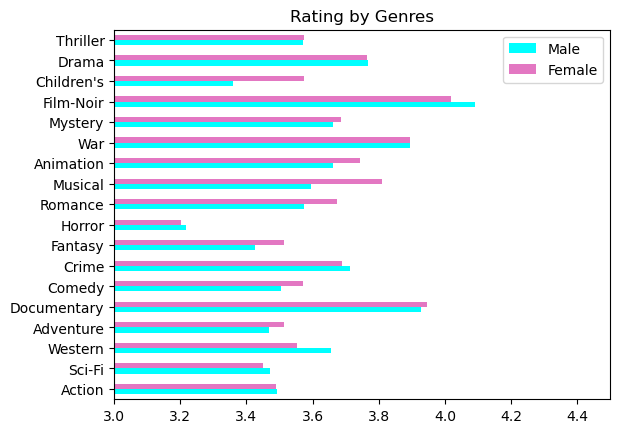

In [15]:
import matplotlib.pyplot as plt
df_2.plot.barh(y=[('Male', 'mean'), ('Female', 'mean')], color=['cyan', 'tab:pink'])
plt.title('Rating by Genres')
plt.xlim(3, 4.5)
plt.legend(['Male', 'Female'])
plt.savefig('ratings by genres.png')

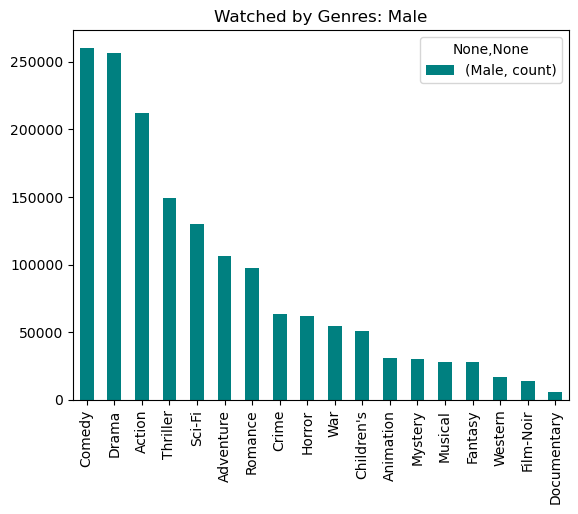

In [16]:
df_2.sort_values(by=('Male', 'count'), inplace=True, ascending=False)
df_2.plot.bar(y=('Male', 'count'), color=(0, 128/255, 128/255))
plt.title('Watched by Genres: Male')
plt.savefig('counts by genres: male.png')

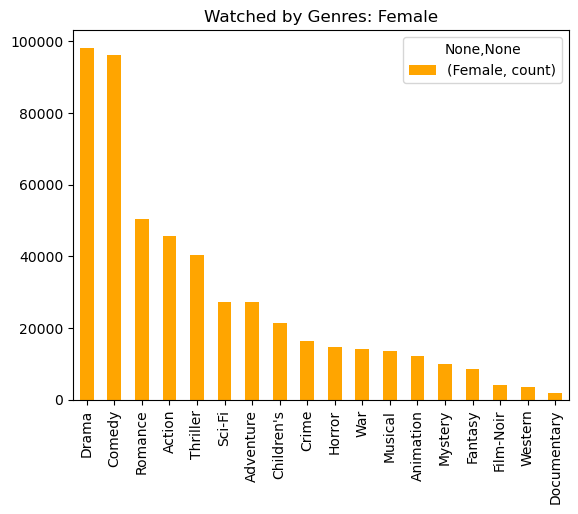

In [17]:
df_2.sort_values(by=('Female', 'count'), inplace=True, ascending=False)
df_2.plot.bar(y=('Female', 'count'), color='orange')
plt.title('Watched by Genres: Female')
plt.savefig('counts by genres: female.png')

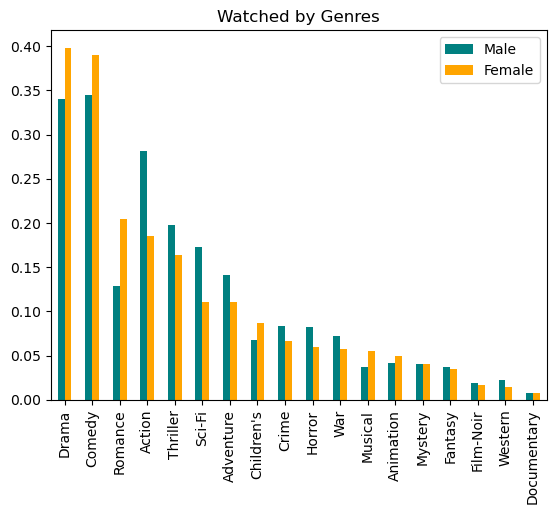

In [18]:
df_2.plot.bar(y=[('Male', 'portion'), ('Female', 'portion')], color=[(0, 128/255, 128/255), 'orange'])
plt.title('Watched by Genres')
plt.legend(['Male', 'Female'])
plt.savefig('counts by genres.png')

## ‰∫å„ÄÅÁî®Êà∑ÂØπÁîµÂΩ±ÁöÑÊâìÂàÜÈ¢ÑÊµã

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime
from sklearn.decomposition import TruncatedSVD



### Á§∫‰æãÔºöÂü∫‰∫éSVDÂØπÁî®Êà∑ÁîµÂΩ±ËØÑÂàÜÊï∞ÊçÆËøõË°åÂçèÂêåËøáÊª§È¢ÑÊµã

In [20]:
train, test = train_test_split(ratings, test_size=0.2, random_state=42)
rating_matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating',)
rating_matrix = rating_matrix.fillna(0)
train_matrix = rating_matrix.copy()
for i in range(len(test)):
    train_matrix.loc[test.iloc[i]['user_id'], test.iloc[i]['movie_id']] = 0
 
# SVDÂàÜËß£
svd_k = 100
svd = TruncatedSVD(n_components=svd_k)
user_vectors = svd.fit_transform(train_matrix)
item_vectors = svd.components_.T

# È¢ÑÊµãËØÑÂàÜ
predicted_ratings = np.dot(user_vectors, item_vectors.T)
predicted_ratings = pd.DataFrame(predicted_ratings, index=rating_matrix.index, columns=rating_matrix.columns)

mse_score = 0
for i in range(len(test)):
    mse_score += (max(int(predicted_ratings.loc[test.iloc[i]['user_id'], test.iloc[i]['movie_id']]),0) - test.iloc[i]['rating']) ** 2
print('MSE:', mse_score / test.shape[0])

MSE: 10.49404625028744


### ËØ∑‰Ω†‰∏çË¶ÅÂ±ÄÈôê‰∫éÂØπËØÑÂàÜÁü©ÈòµÂÅöSVDÂàÜËß£ÔºåÂ∞ùËØïÂä†ÂÖ•Áî®Êà∑Á±ªÂûãÂèäÂÅèÂ•ΩËøõË°å‰ºòÂåñ„ÄÇÂè¶ÔºöÂä†ÂÖ•ÁîµÂΩ±‰ø°ÊÅØËé∑ÂæóÂ•ΩÁöÑÊïàÊûúÂèØ‰ª•Âä†5ÂàÜ„ÄÇ

In [21]:
# ËØÑÂàÜÂèÇËÄÉ
mse_score = 0
def grade(score):
    if score >= 2:
        return 0
    elif score >= 1:
        return 30
    else:
        return 40

## ‰∏â„ÄÅÁîµÂΩ±Êµ∑Êä•ËÅöÁ±ªÂàÜÊûê

In [22]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torch
from img2vec_pytorch import Img2Vec



# Êñá‰ª∂Â§πË∑ØÂæÑ
folder_path = "./poster"

# ÂàùÂßãÂåñÁâπÂæÅÂàóË°®
features = []

img2vec_model = Img2Vec()
# ÈÅçÂéÜÊñá‰ª∂Â§π‰∏≠ÁöÑÊØè‰∏™Êµ∑Êä•ÂõæÂÉè
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # ËØªÂèñÂõæÂÉè
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # ÊèêÂèñÈ¢úËâ≤Áõ¥ÊñπÂõæÂíåÁÅ∞Â∫¶Áõ¥ÊñπÂõæÁâπÂæÅ
        image = Image.open(image_path)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        vector = img2vec_model.get_vec(image)

        feature_vector = vector

        # Ê∑ªÂä†ÂõæÂÉèÊñá‰ª∂ÂâçÁºÄÔºàÁîµÂΩ±IDÔºâÂíåÁâπÂæÅÂêëÈáèÂà∞ÁâπÂæÅÂàóË°®‰∏≠
        features.append([filename.split('.')[0], feature_vector])

# Â∞ÜÁâπÂæÅÂàóË°®ËΩ¨Êç¢‰∏∫DataFrame
columns = ['movie_id', 'features']
df = pd.DataFrame(features, columns=columns)

# ËæìÂá∫Â∏¶ÊúâÁîµÂΩ±IDÂíåÁâπÂæÅÂêëÈáèÁöÑDataFrame
print("DataFrame with Movie ID and Features:")
print(df.head())

DataFrame with Movie ID and Features:
  movie_id                                           features
0     1430  [0.4136729, 2.1776845, 0.85309166, 1.035356, 1...
1     3391  [0.80747545, 1.5654334, 0.93173194, 0.01969247...
2     2618  [0.18467441, 0.71609473, 0.17207062, 0.3224041...
3      472  [1.689616, 0.74003905, 0.3010845, 0.17777342, ...
4     2810  [0.23077062, 0.3200877, 0.010672037, 1.046026,...


### Êó†ÁõëÁù£ËÅöÁ±ªÁªìÊûúÁöÑÂèØËßÜÂåñ

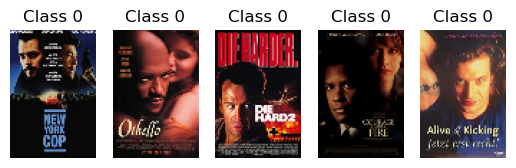

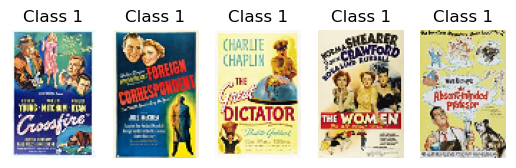

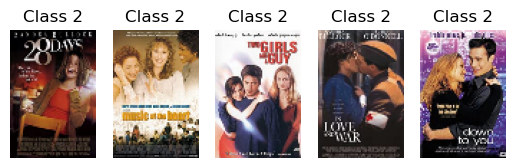

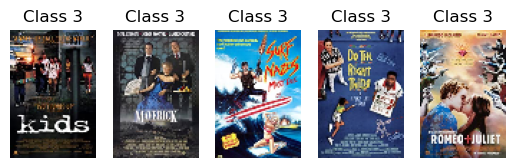

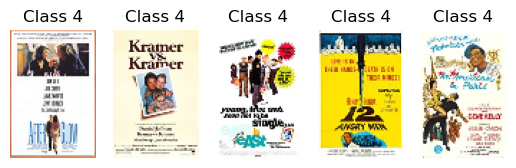

In [25]:
import matplotlib.pyplot as plt
# ÊâìÂç∞ÊØè‰∏™Á±ªÂà´ÁöÑ‰ª£Ë°®ÊÄßÂõæÂÉè
for i, indices in enumerate(representative_images):
    # ËÆæÁΩÆÂõæÂÉèÁöÑÂ§ßÂ∞è
    for j, index in enumerate(indices):
        # ËØªÂèñ‰ª£Ë°®ÊÄßÂõæÂÉè
        representative_image_path = os.path.join(folder_path, os.listdir(folder_path)[index])
        representative_image = cv2.imread(representative_image_path)
        representative_image = cv2.resize(representative_image, (60, 90))
        # ÁªòÂà∂ÂõæÂÉè
        plt.subplot(1, 5, j+1)
        plt.imshow(cv2.cvtColor(representative_image, cv2.COLOR_BGR2RGB))
        plt.title("Class {}".format(i))
        plt.axis("off")

    plt.show()


### ÊúâÁõëÁù£ËÅöÁ±ª

In [26]:
import pandas as pd

# ËØªÂèñCSVÊñá‰ª∂
movies_df = pd.read_csv("./movies.csv")

# ÊèêÂèñgenre‰ø°ÊÅØ
genres = movies_df['genres']
# ÂàùÂßãÂåñgenreÁöÑÂ≠óÂÖ∏
genre_dict = {}

# ÈÅçÂéÜÊØè‰∏™ÁîµÂΩ±ÁöÑgenre‰ø°ÊÅØ
for genre_string in genres:
    # Â∞ÜgenreÂ≠óÁ¨¶‰∏≤ÊåâÁÖß"|"ÂàÜÂâ≤ÊàêÂàóË°®
    genre_list = genre_string.split("|")
    # ÈÅçÂéÜÂàóË°®‰∏≠ÁöÑÊØè‰∏™genre
    for genre in genre_list:
        # Â∞ÜgenreÊ∑ªÂä†Âà∞Â≠óÂÖ∏‰∏≠ÔºåÂ¶ÇÊûúÂ∑≤Â≠òÂú®Âàô‰∏çÈáçÂ§çÊ∑ªÂä†
        if genre not in genre_dict:
            genre_dict[genre] = len(genre_dict)

# ËæìÂá∫genreÂ≠óÂÖ∏
print("Genre Dictionary:")
print(genre_dict)

Genre Dictionary:
{'Animation': 0, "Children's": 1, 'Comedy': 2, 'Adventure': 3, 'Fantasy': 4, 'Romance': 5, 'Drama': 6, 'Action': 7, 'Crime': 8, 'Thriller': 9, 'Horror': 10, 'Sci-Fi': 11, 'Documentary': 12, 'War': 13, 'Musical': 14, 'Mystery': 15, 'Film-Noir': 16, 'Western': 17}


In [27]:

# Â∞Ügenre‰ø°ÊÅØËΩ¨Êç¢‰∏∫ÂêëÈáèÂΩ¢Âºè
genre_vectors = []

# ÈÅçÂéÜÊØè‰∏™ÁîµÂΩ±ÁöÑgenre‰ø°ÊÅØ
for genre_string in genres:
    # Â∞ÜgenreÂ≠óÁ¨¶‰∏≤ÊåâÁÖß"|"ÂàÜÂâ≤ÊàêÂàóË°®
    genre_list = genre_string.split("|")
    # ÂàùÂßãÂåñgenreÂêëÈáè
    genre_vector = [0] * len(genre_dict)
    # Ê†πÊçÆgenreÂàóË°®ËÆæÁΩÆÂêëÈáè‰∏≠ÂØπÂ∫îÁöÑ‰ΩçÁΩÆ‰∏∫1
    for genre in genre_list:
        genre_vector[genre_dict[genre]] = 1
    # Â∞ÜgenreÂêëÈáèÊ∑ªÂä†Âà∞ÂàóË°®‰∏≠
    genre_vectors.append(genre_vector)

# Â∞ÜgenreÂêëÈáèËΩ¨Êç¢‰∏∫ÂàóË°®
genre_lists = [list(genre_vector) for genre_vector in genre_vectors]

# Â∞ÜgenreÂàóË°®Ê∑ªÂä†Âà∞movies_df‰∏≠
movies_df['genre_vector'] = genre_lists

# ËæìÂá∫Â∏¶ÊúâgenreÂêëÈáèÁöÑmovies_df
print("Movies DataFrame with Genre Vector:")
print(movies_df.head())

Movies DataFrame with Genre Vector:
   Unnamed: 0  movie_id                               title  \
0           0         1                    Toy Story (1995)   
1           1         2                      Jumanji (1995)   
2           2         3             Grumpier Old Men (1995)   
3           3         4            Waiting to Exhale (1995)   
4           4         5  Father of the Bride Part II (1995)   

                         genres  \
0   Animation|Children's|Comedy   
1  Adventure|Children's|Fantasy   
2                Comedy|Romance   
3                  Comedy|Drama   
4                        Comedy   

                                        genre_vector  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


In [28]:
# Â∞ÜÁîµÂΩ±IDÂàóËΩ¨Êç¢‰∏∫Êï¥Êï∞Á±ªÂûã
movies_df['movie_id'] = movies_df['movie_id'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)

In [29]:
# ‰ΩøÁî® merge ÊñπÊ≥ïÊåâÁÖß movie_id ÂêàÂπ∂‰∏§‰∏™ DataFrame
merged_df = pd.merge(movies_df, df, on='movie_id', how='inner')

# ËæìÂá∫ÂêàÂπ∂ÂêéÁöÑ DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   Unnamed: 0  movie_id                               title  \
0           0         1                    Toy Story (1995)   
1           1         2                      Jumanji (1995)   
2           2         3             Grumpier Old Men (1995)   
3           3         4            Waiting to Exhale (1995)   
4           4         5  Father of the Bride Part II (1995)   

                         genres  \
0   Animation|Children's|Comedy   
1  Adventure|Children's|Fantasy   
2                Comedy|Romance   
3                  Comedy|Drama   
4                        Comedy   

                                        genre_vector  \
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                            features  


In [30]:
print(merged_df.columns)

Index(['Unnamed: 0', 'movie_id', 'title', 'genres', 'genre_vector',
       'features'],
      dtype='object')


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ÊèêÂèñÁâπÂæÅÂíåÊ†áÁ≠æ
X = np.array(merged_df['features'].tolist())
y = np.array(merged_df['genre_vector'].tolist())

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:

# ÂàõÂª∫Â§öÊ†áÁ≠æ k ËøëÈÇªÂàÜÁ±ªÂô®
knn = KNeighborsClassifier()
multi_knn = MultiOutputClassifier(knn, n_jobs=-1)

# ËÆ≠ÁªÉÂàÜÁ±ªÂô®
multi_knn.fit(X_train, y_train)

# È¢ÑÊµã
y_pred = multi_knn.predict(X_test)

# ËØÑ‰º∞ÂàÜÁ±ªÂô®ÊÄßËÉΩ
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.11394557823129252
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        29
           1       0.64      0.18      0.28        51
           2       0.48      0.36      0.41       181
           3       0.67      0.04      0.08        49
           4       0.00      0.00      0.00         8
           5       0.27      0.08      0.12        77
           6       0.52      0.39      0.45       251
           7       0.15      0.04      0.07        96
           8       0.00      0.00      0.00        35
           9       0.34      0.16      0.22        73
          10       1.00      0.02      0.03        57
          11       0.33      0.02      0.04        44
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        26
          14       0.17      0.05      0.07        22
          15       0.00      0.00      0.00        18
          16       0.00     

In [33]:
# ËØÑÂàÜÂèÇËÄÉ
accuracy_score = 0
def grade(score):
    if score <= 0.2:
        return 0
    elif score <= 0.3:
        return 30
    elif score <= 0.4:
        return 40
    else:
        return 50